Contribution:

Udit -> 1st question code and report, 2nd question code for evo.
Shubodh -> 2nd question code of algorithm and report.

## Finding equations of epipolar lines

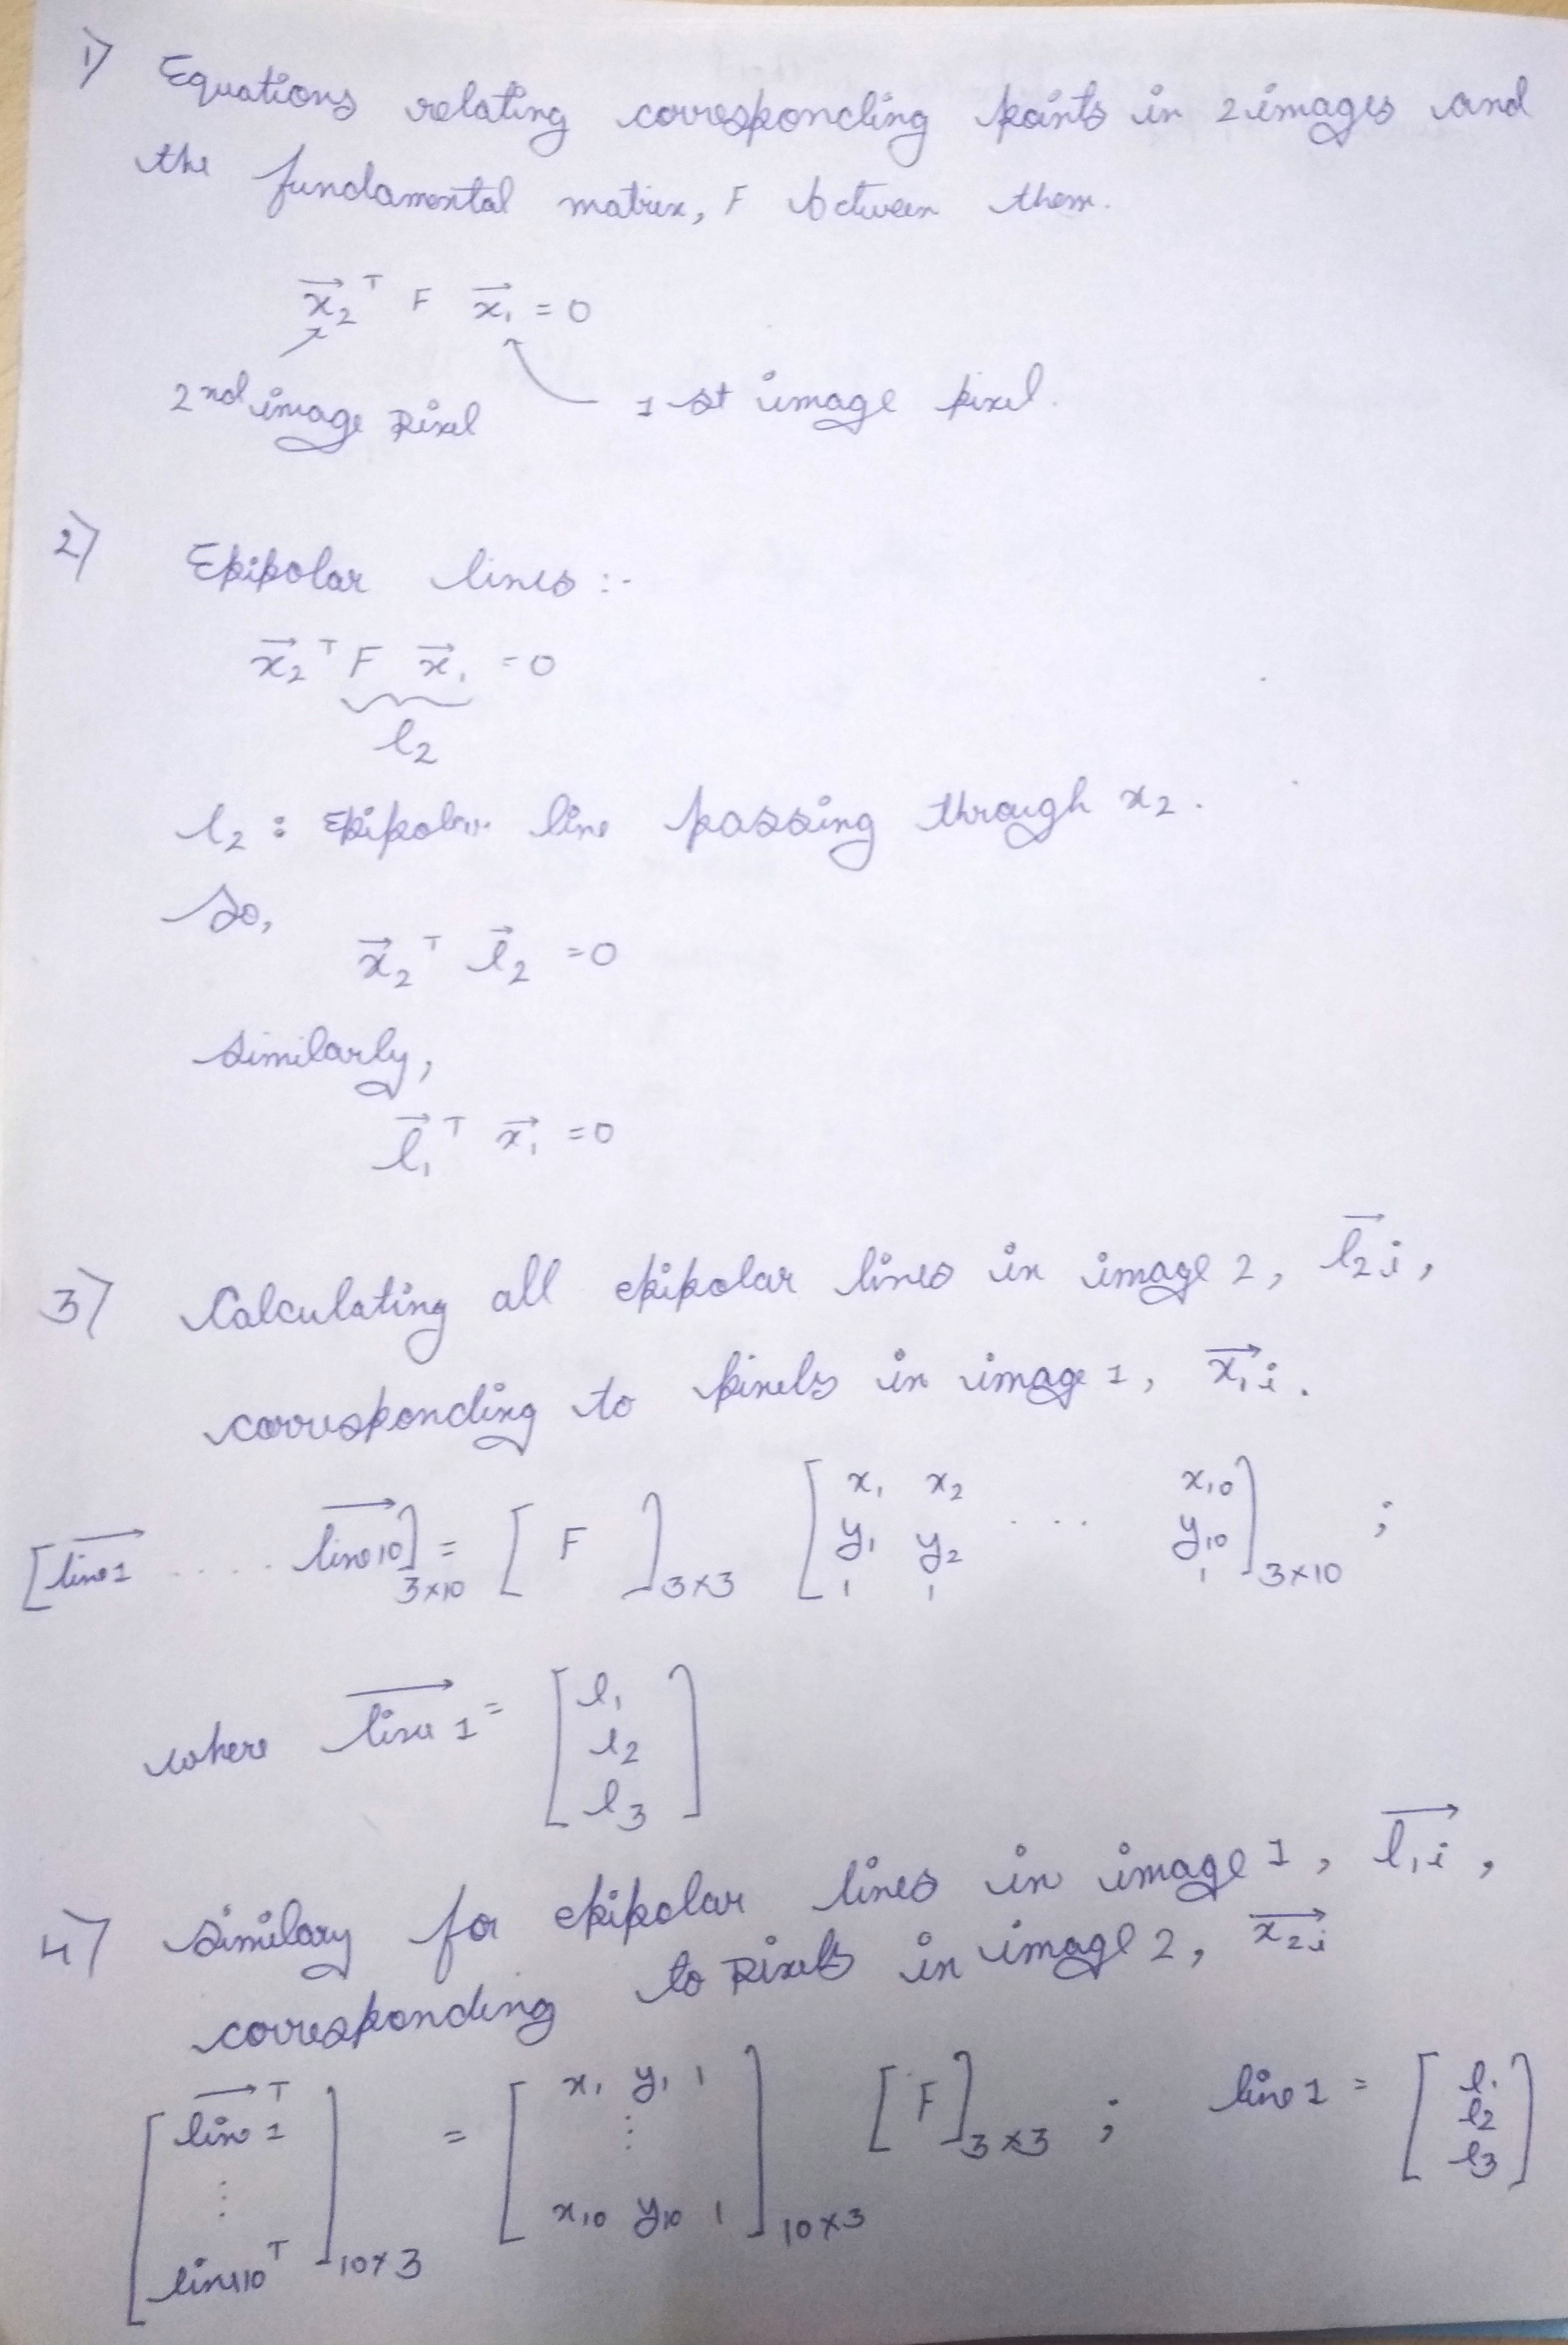

In [1]:
import numpy as np

# Loading given corresponding pixels and F matrix

p1 = np.array([[381, 402],
             [452, 497],
             [671, 538],
             [501, 254],
             [506, 381],
             [474, 440],
             [471, 537],
             [498, 364],
             [706, 319],
             [635, 367]])

p2 = np.array([[390, 346],
             [439, 412],
             [651, 417],
             [477, 194],
             [482, 300],
             [456, 359],
             [454, 444],
             [475, 287],
             [686, 185],
             [606, 253]])

F = np.array([[-1.29750186e-06,  8.07894025e-07,  1.84071967e-03],
            [3.54098411e-06,  1.05620725e-06, -8.90168709e-03],
            [-3.29878312e-03,  5.14822628e-03,  1.00000000e+00]])

In [2]:
# Loading images

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
img1 = mpimg.imread('./img1.jpg')
img2 = mpimg.imread('./img2.jpg')

In [3]:
# Getting equations of epipolar lines for 2nd image

(r, c) = p1.shape
ones = np.ones((r, 1))
p1_h = np.hstack((p1, ones)).T

lines2 = np.dot(F, p1_h)
print(p1_h.shape)

(3, 10)


## Converting homogeneous equations of lines into cartesian form for plotting 

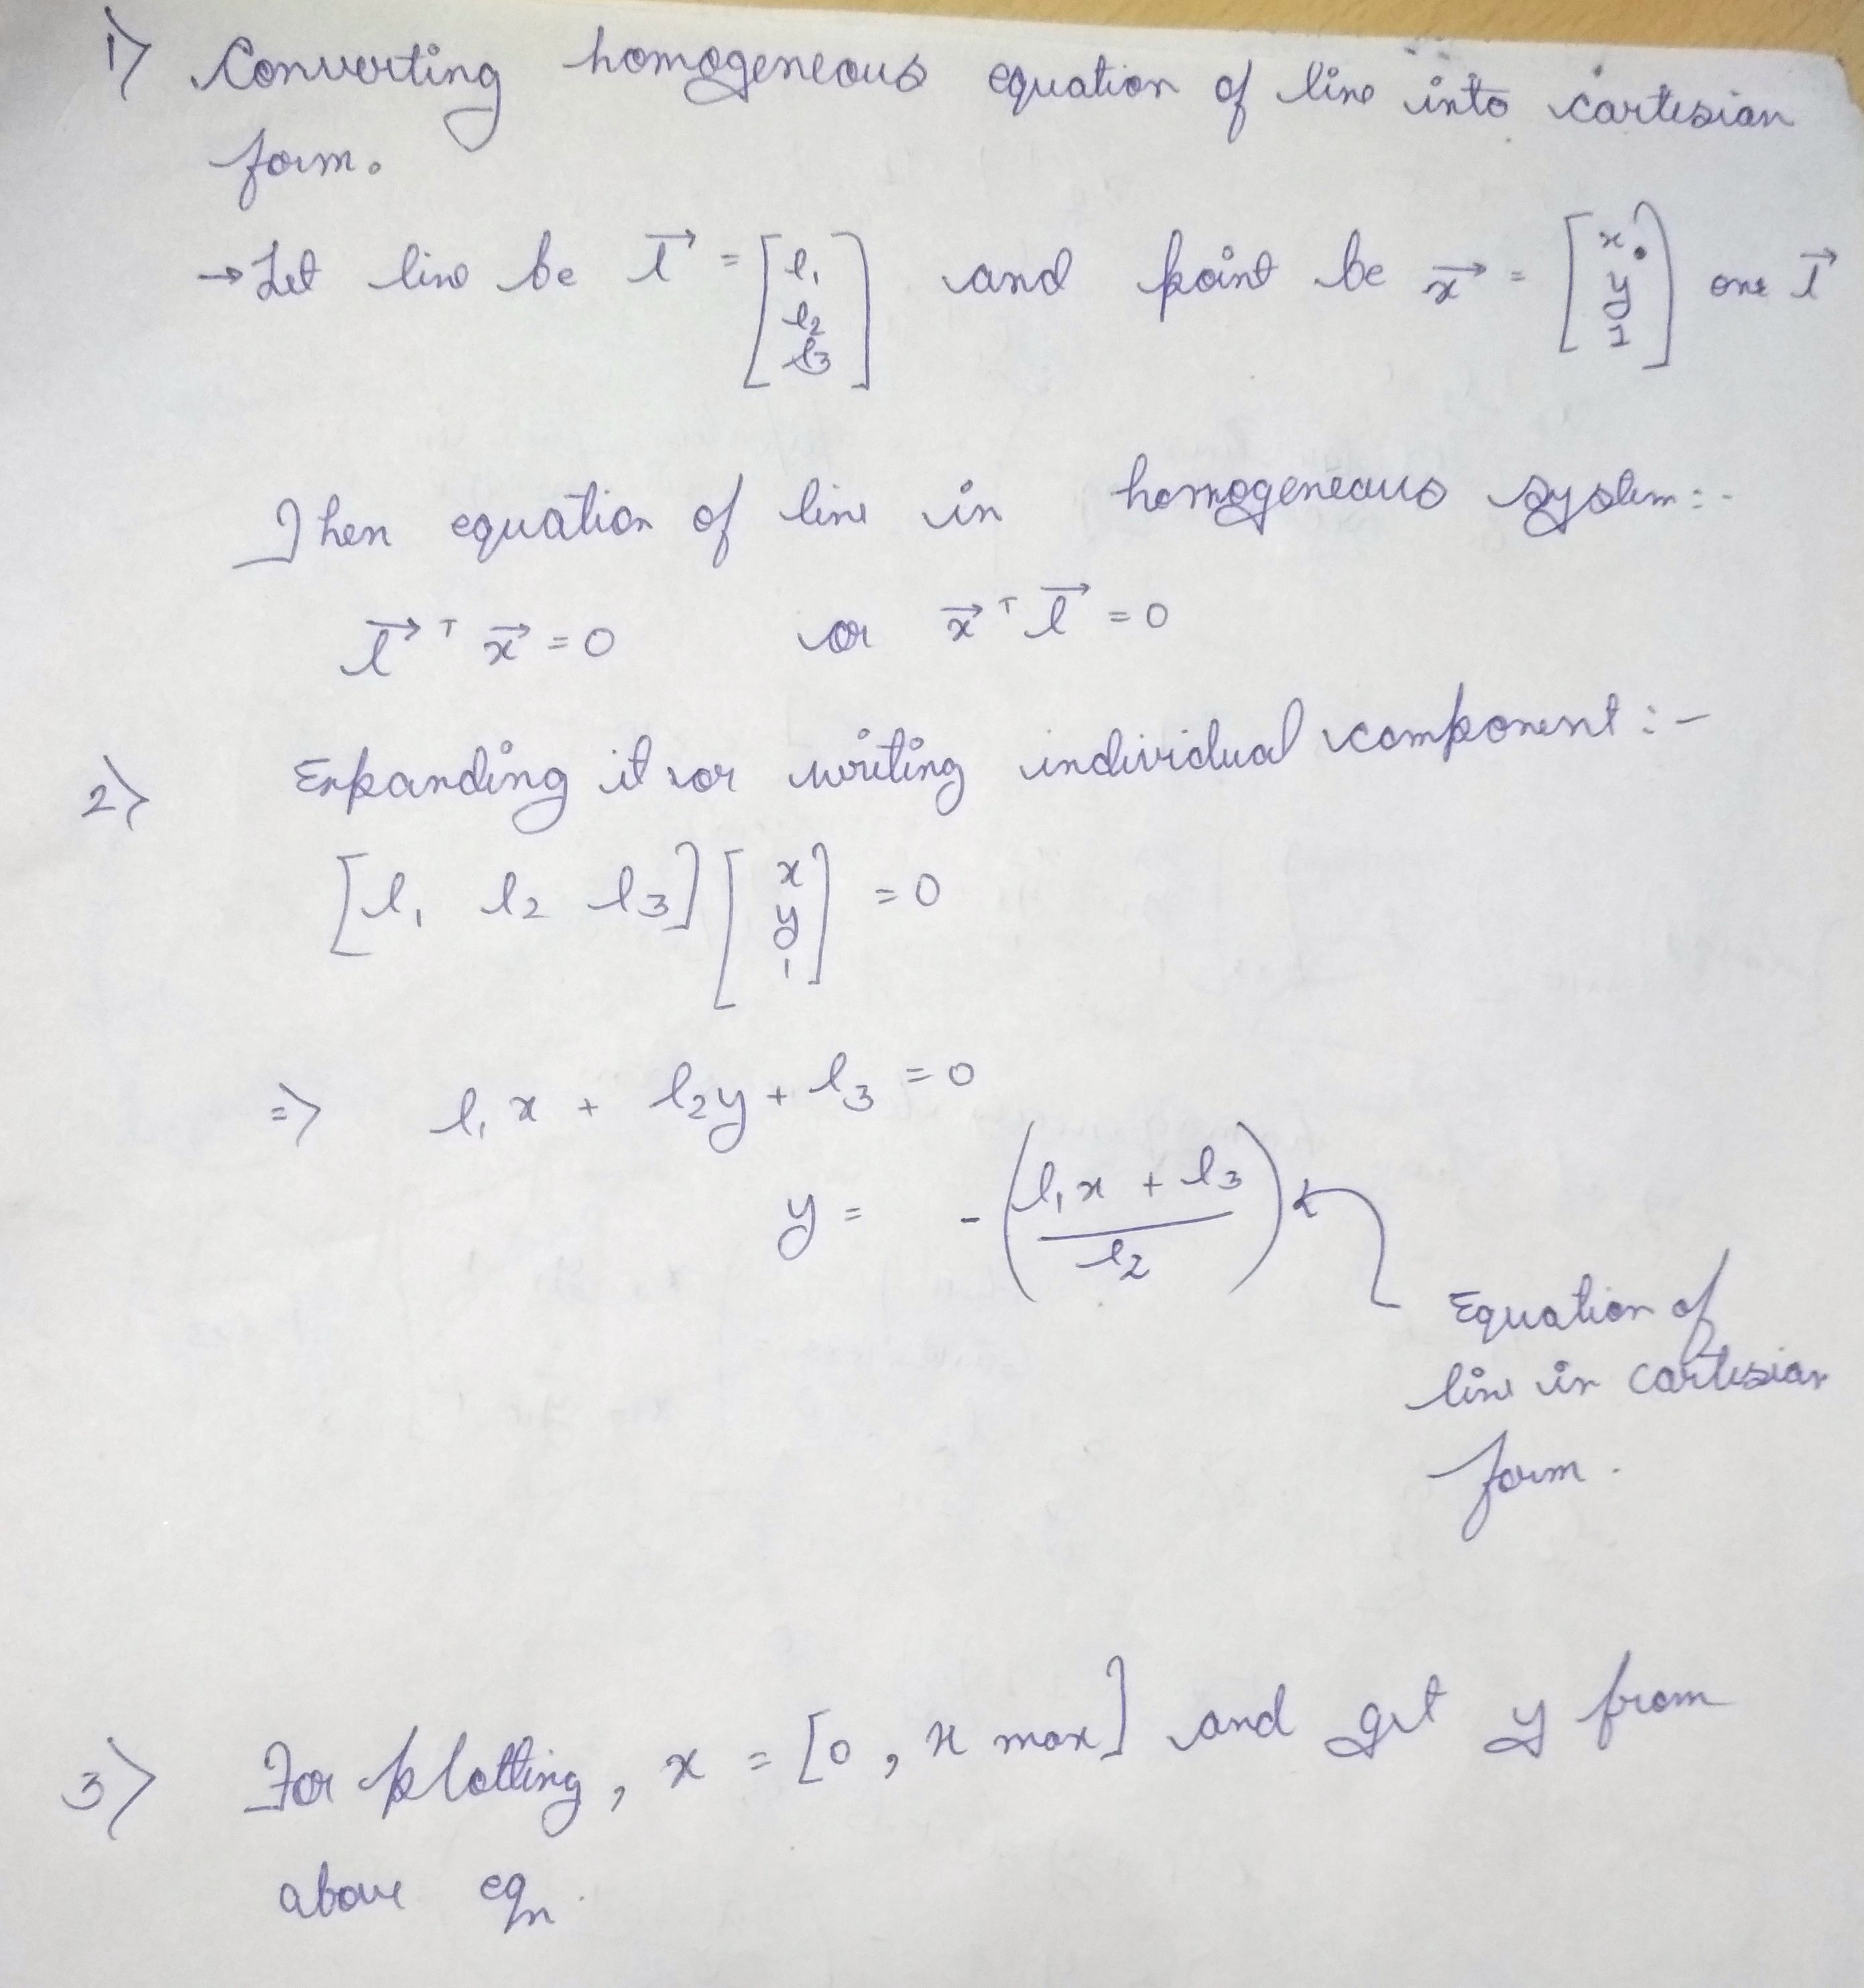

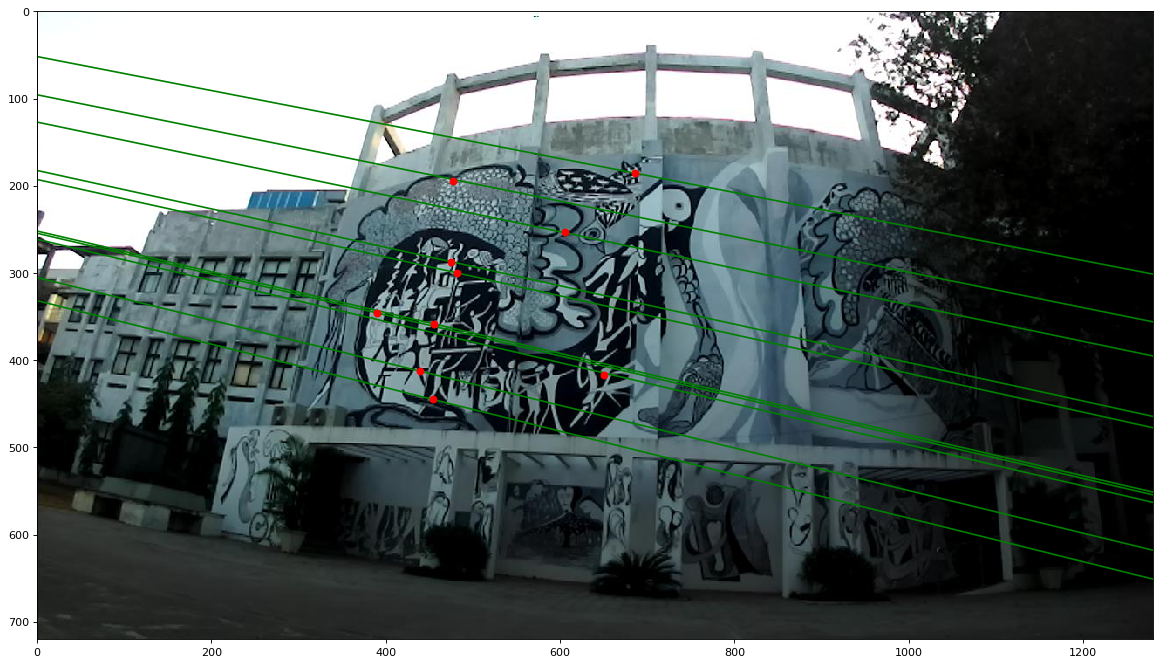

In [4]:
# Expressing homogeneous equation of epipolar lines for 2nd image in cartesian form for plotting

fig = plt.figure(figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
imgplot = plt.imshow(img2)

(r, c, d) = img2.shape
plt.xlim(0, c)
plt.ylim(0, r)

for j in range(lines2.shape[1]):
    l = lines2[:, j]
    
    x = np.linspace(-c, c, 100)
    y = -(l[0]*x + l[2])/l[1]
    plt.plot(x, y, '-g')

plt.plot(p2[:, 0], p2[:, 1], 'ro')
    
plt.gca().invert_yaxis()
plt.show()

In [5]:
# Getting equations of epipolar lines for 1st image


(r, c) = p2.shape
ones = np.ones((r, 1))
p2_h = np.hstack((p2, ones))

lines1 = np.dot(p2_h, F).T

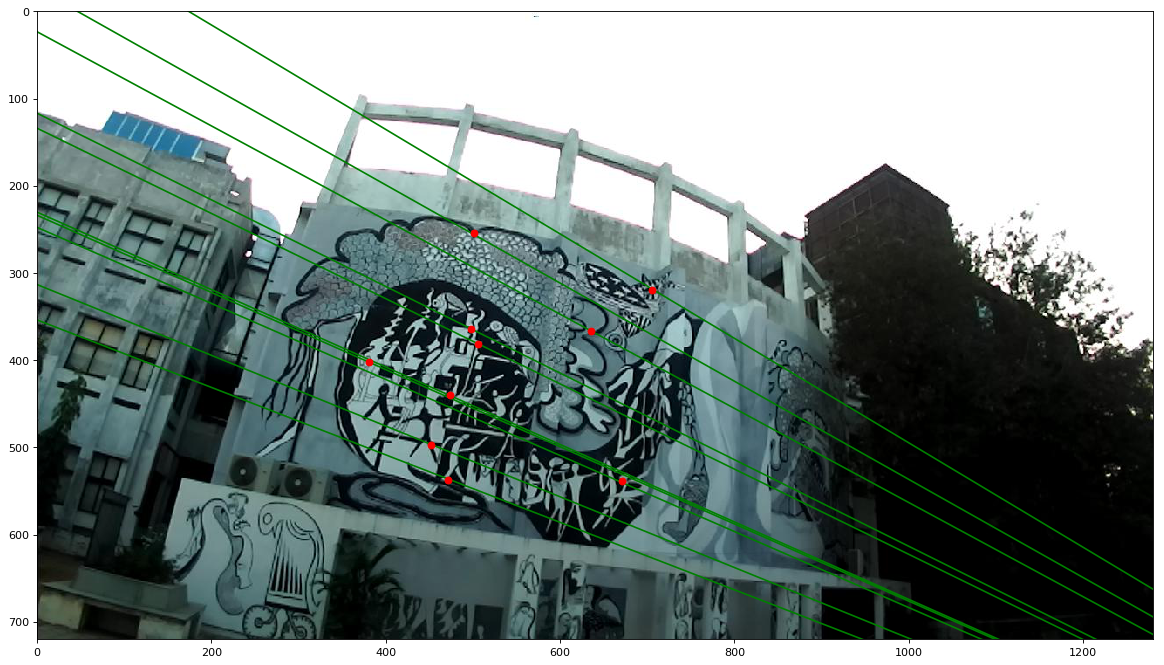

In [6]:
# Expressing homogeneous equation of epipolar lines for 1st image in cartesian form for plotting 

fig = plt.figure(figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
imgplot = plt.imshow(img1)

(r, c, d) = img1.shape
plt.xlim(0, c)
plt.ylim(0, r)

for j in range(lines1.shape[1]):
    l = lines1[:, j]
    
    x = np.linspace(-c, c, 100)
    y = -(l[0]*x + l[2])/l[1]
    plt.plot(x, y, '-g')

plt.plot(p1[:, 0], p1[:, 1], 'ro')
    
plt.gca().invert_yaxis()
plt.show()

## Finding epipoles by decomposing fundamental matrix 

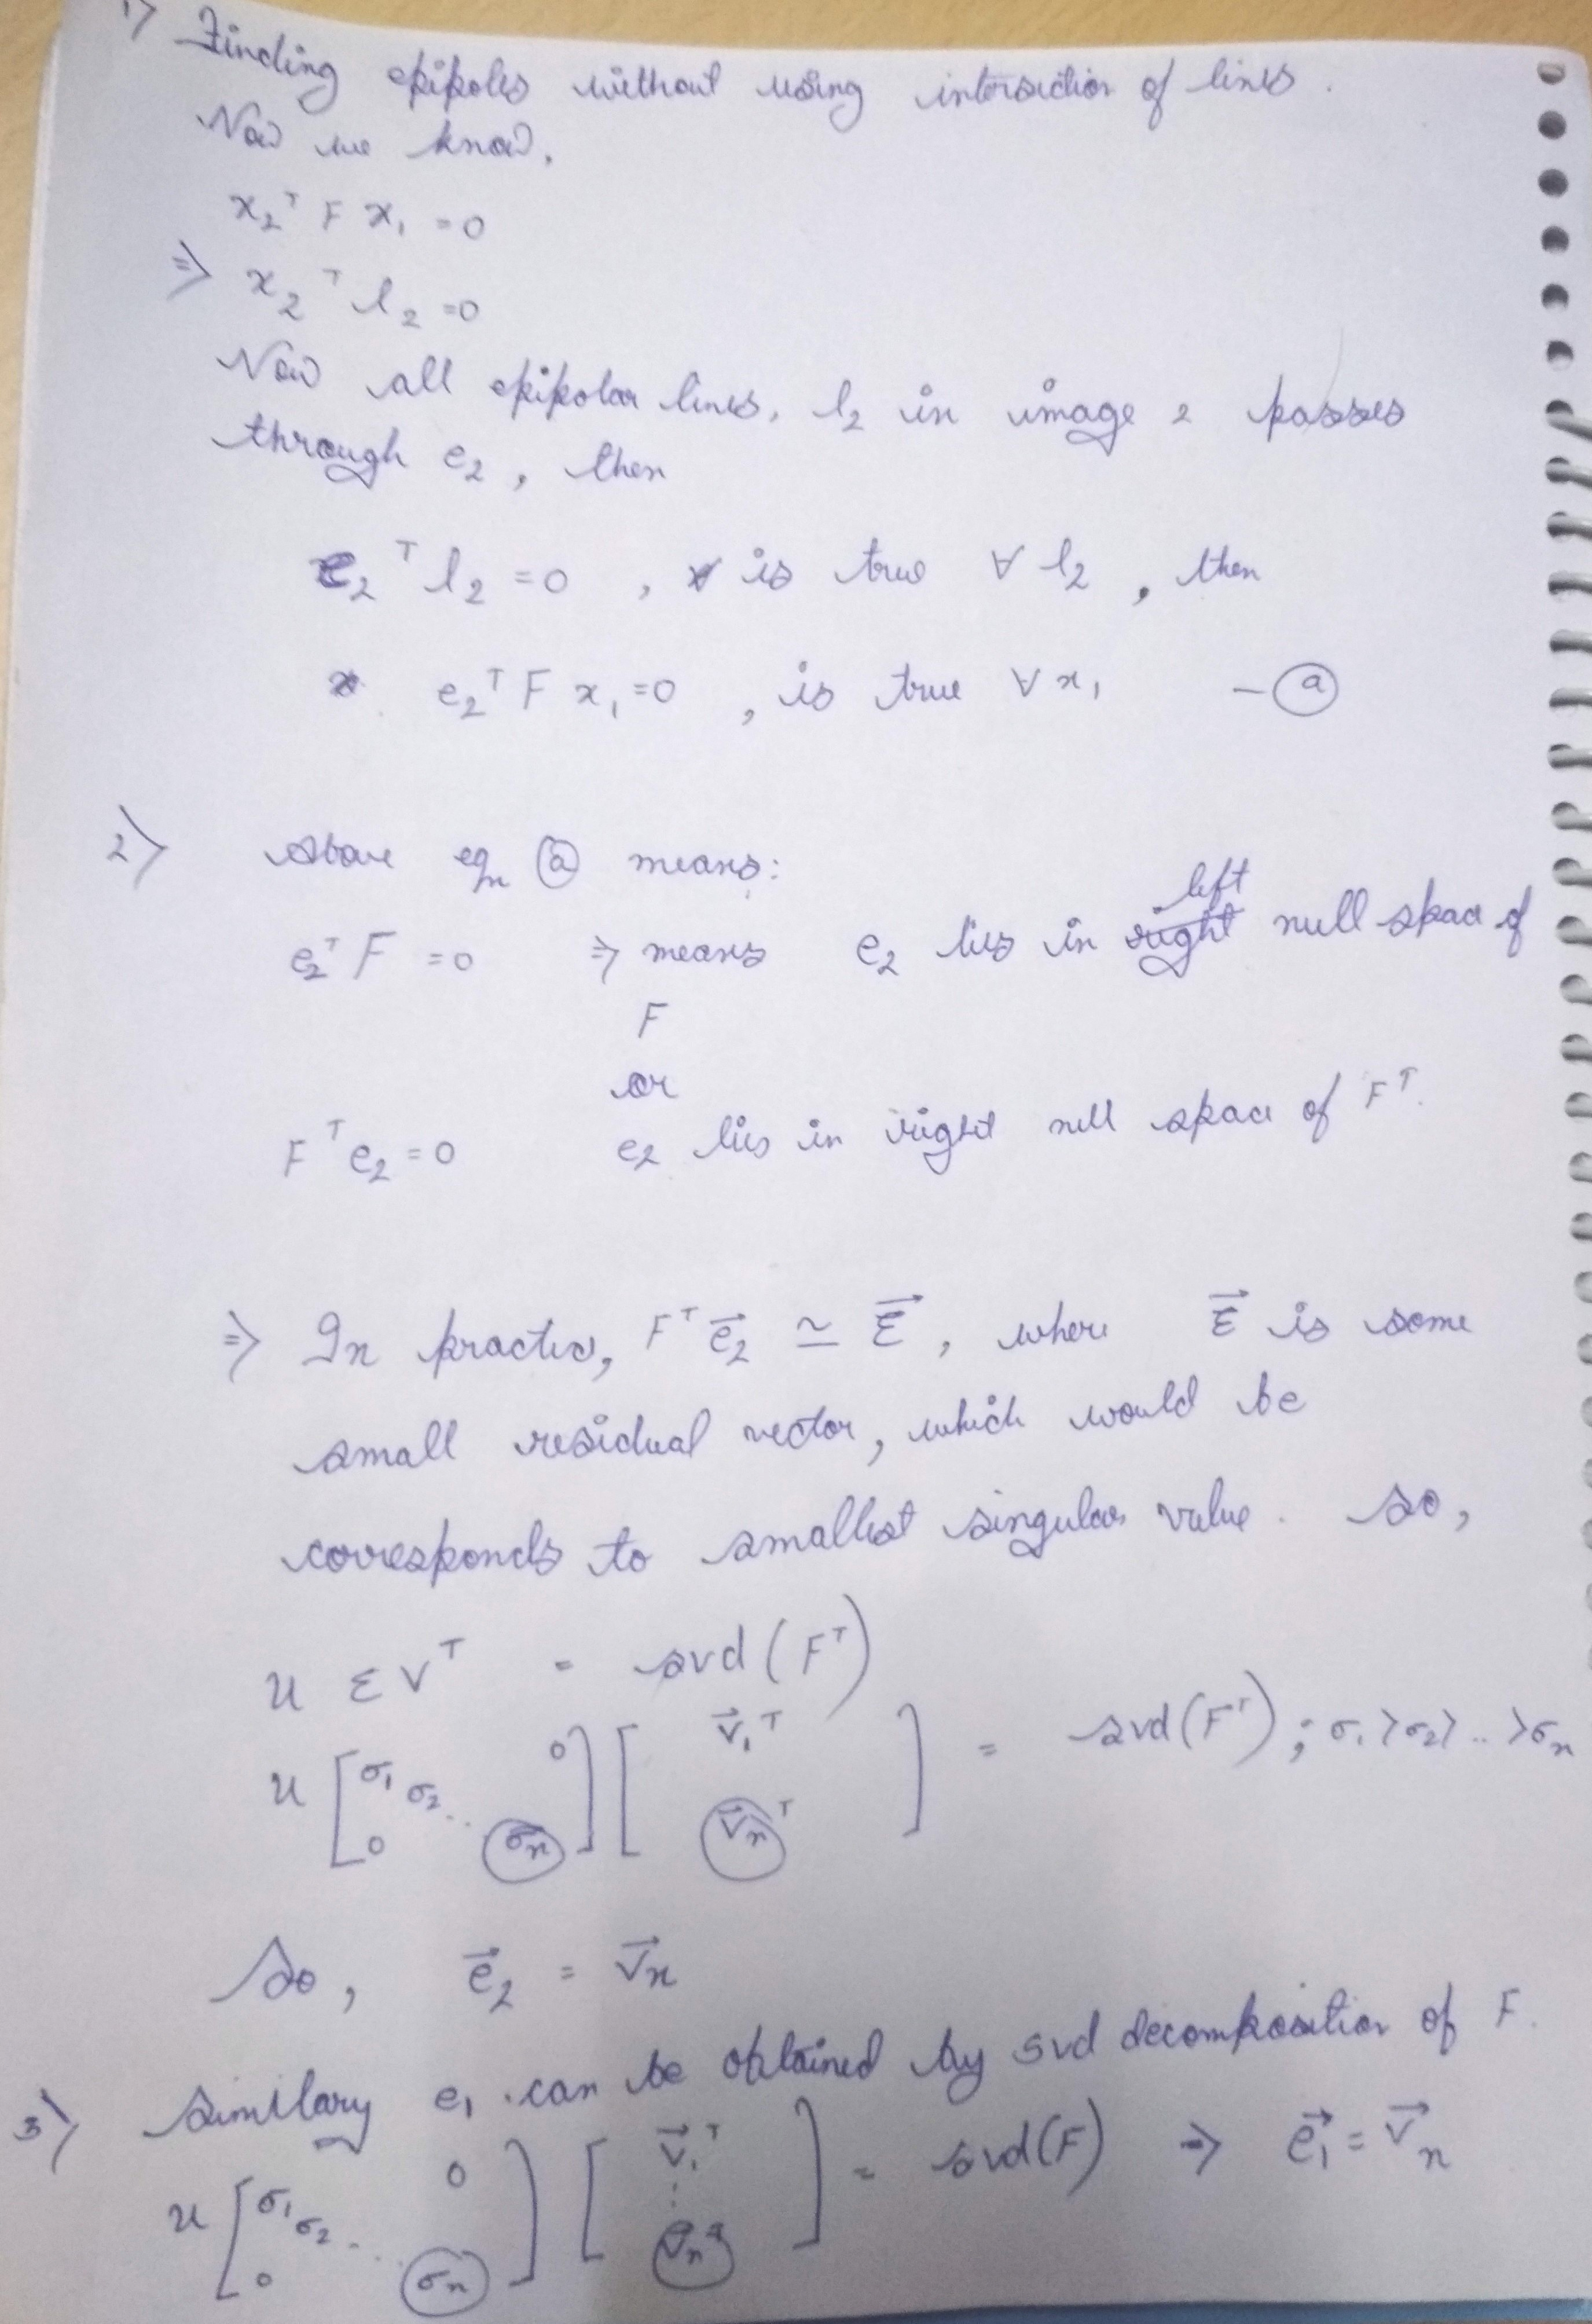

In [7]:
# e2 = null_space(F.T) and e1 = null_space(F)

(U, S, Vh) = np.linalg.svd(F, full_matrices=True)
e1 = Vh[-1, :]
e1 = e1/e1[2]

(U, S, Vh) = np.linalg.svd(F.T, full_matrices=True)
e2 = Vh[-1, :]
e2 = e2/e2[2]

print(e1, e2)

[2.15916628e+03 1.18926810e+03 1.00000000e+00] [-5.13190964e+03 -9.48854631e+02  1.00000000e+00]


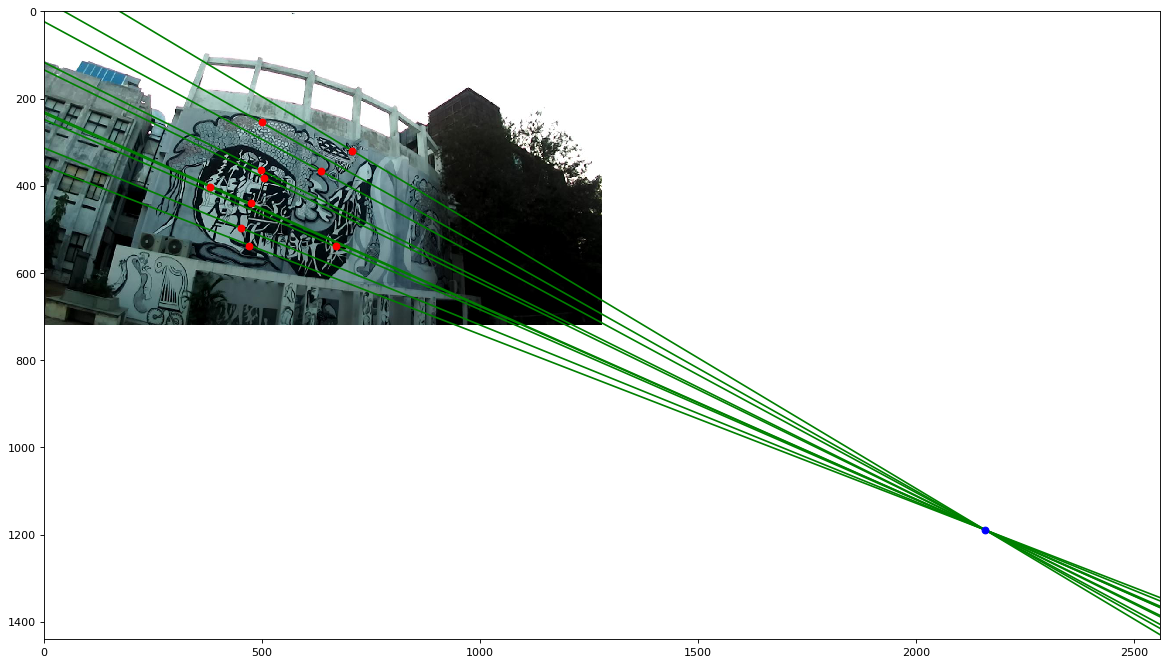

In [8]:
# Plotting epipolar point and epipolar lines of 1st image, both calculated through independent methods

fig = plt.figure(figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
imgplot = plt.imshow(img1)

(r, c, d) = img1.shape
plt.xlim(0, 2*c)
plt.ylim(0, 2*r)

for j in range(lines1.shape[1]):
    l = lines1[:, j]
    
    x = np.linspace(-c, 2*c, 100)
    y = -(l[0]*x + l[2])/l[1]
    plt.plot(x, y, '-g')

plt.plot(p1[:, 0], p1[:, 1], 'ro')

plt.plot(e1[0], e1[1], 'bo')
    
plt.gca().invert_yaxis()
plt.show()

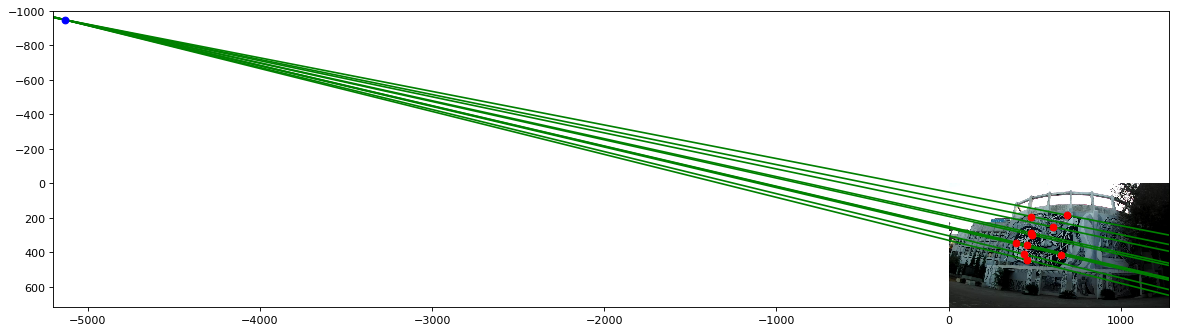

In [9]:
# Plotting epipolar point and epipolar lines of 2nd image, both calculated through independent methods

fig = plt.figure(figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
imgplot = plt.imshow(img2)

(r, c, d) = img2.shape
plt.xlim(-5200, c)
plt.ylim(-1000, r)

for j in range(lines2.shape[1]):
    l = lines2[:, j]
    
    x = np.linspace(-5200, c, 100)
    y = -(l[0]*x + l[2])/l[1]
    plt.plot(x, y, '-g')

plt.plot(p2[:, 0], p2[:, 1], 'ro')

plt.plot(e2[0], e2[1], 'bo')

plt.gca().invert_yaxis()
plt.show()